In [2]:
import numpy as np
from jedi_dataset import JediDataset
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
import numpy as np
import pandas as pd
import scipy.io as sio

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.stats.stats import pearsonr   
from scipy.stats import zscore

In [3]:
features_path = '/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/data_dog_flipped0.2'
jedi_dataset = JediDataset(features_path=features_path, name='dog')

In [10]:
# get the metadata
meta_path = "/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/nameMapping_fullInfo_flipped0.2.mat"
data = sio.loadmat(meta_path)['nameMapping']
rows = []
for d in data:
    rows.append([x[0] for x in d.tolist()])
df = pd.DataFrame(rows, columns=['img_name','common_name','dataset','train_test','class','is_flipped'])
df['flipped'] = df.is_flipped.apply(lambda x: 1 if x == 'flipped' else 0)


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [15]:
df.sort_values('flipped').tail(30)

img_name                                common_name  \
186   liangyue_dd (14)_resize.jpg  7B89FU5IMAHOXKYD6VZNRCLTSE0JG4Q3WP12_0187   
901     n02124623_9488_resize.jpg  AJRIFZVYP21NK04O8DXW6TM7L39B5UCGSQHE_0902   
1352       yasu_dd (2)_resize.jpg  SKOILMTUV41ZWR3B6GX0FND28H7QECAP9Y5J_1353   
611     n02115641_8891_resize.jpg  H945UIW6NPZE78OKVSGAFBY1LCXQJRM3TD02_0612   
410     n02109961_1076_resize.jpg  AWP5VCQS2OFJBMKZN097L4GTIYXREH61UD38_0411   
749     n02124075_5492_resize.jpg  M5EV2U3RZ70BHYQW98FGI16XDNTPJ4LAKCSO_0750   
369    n02084861_16041_resize.jpg  PI92Z5GC1FJSUHAM3R8YWT4X0NEDBQ7KOL6V_0370   
614     n02115641_9405_resize.jpg  YUKN0C3OS7J4AIMD2QXZH1REWGL958T6PBVF_0615   
1073    n02381460_1158_resize.jpg  3BXVE91PUDT2CINMY5Z86GQ0HAO7LKF4JRWS_1074   
1237    sizhang_wc (1)_resize.jpg  B5U4KYSAV1D8WXJENL9MRP7Q03FCH6IZOGT2_1238   
743     n02124075_4165_resize.jpg  1INVJB9MQD4XTK8WZO6FP2HA57L0US3YECGR_0744   
420     n02109961_2289_resize.jpg  Q6PGN3KXC7D5UVHOE91R4AZY0WJ2FBSMIL8T_0421   
767     n02124313_2152_resize.jpg  ENMJ75KAGB2TVXHPD6QUI81RFY0C3WO9SLZ4_0768   
1248    sizhang_wc (2)_resize.jpg  7X5KDM2PAVIRO8NSQHUJEC1BYF0LTWZ6439G_1249   
1247   sizhang_wc (19)_resize.jpg  Y7H4C06L3I19QANJRW8GPKDFXMU5ST2VEOZB_1248   
429      n02109961_467_resize.jpg  W2UQL4YJ83N90RGK6VH75BDAETOZMSI1CPFX_0430   
906    n02375302_10111_resize.jpg  OZLUJMV81CAF3IBT6N2KXGDSY5740EHRW9QP_0907   
955     n02375302_5296_resize.jpg  UYKHDFSZI8925W3GVTARPQOE04JL617BXCNM_0956   
300   liangyue_wh (20)_resize.jpg  3SNW4KVLAUJ2T8RH671BI9ZQEXFMDG5Y0OCP_0301   
301   liangyue_wh (21)_resize.jpg  Q0XVOM6WKPG9TIJA8ECF41LD5BYH23ZRN7US_0302   
302   liangyue_wh (22)_resize.jpg  LOJHZUKTDN0XMBFVWRIQYE97A5G3C462S81P_0303   
905    n02375302_10092_resize.jpg  4XM0JAF6VCYDT5WE1ZULKH7NOR8QBP2G3SI9_0906   
904    n02375302_10060_resize.jpg  804UCMNWYOPRKAQTZH21BE5SF9J3I6V7LGXD_0905   
520      n02114100_396_resize.jpg  K4DP5BCW2MI0LF8EJGXY9RS31N6QOZTHVU7A_0521   
244   liangyue_wc (23)_resize.jpg  SDXANCOKR8Y512M60FWJ4QETL79ZBP3IUGHV_0245   
1091    n02381460_3228_resize.jpg  JCRBA7N4TMYOIVPX5ZS0E1938QUWLFK2DH6G_1092   
1162    n02389128_5610_resize.jpg  BRNLT90Y8SEFXIDA3PZ6OU5CQK7214GWVJMH_1163   
768     n02124313_3212_resize.jpg  JW567OZ0M8BAVHY9E3GR2UPCIDFKL41TQSXN_0769   
849     n02124623_3942_resize.jpg  NZJPTI89DGLW5HQCE71V0FY2R6UOMAB3SX4K_0850   
1191    sizhang_dc (5)_resize.jpg  F7EXDK5ICVRMGAWSBZ0UH946T28LJ1PO3YQN_1192   

     dataset train_test     class is_flipped  flipped  
186      dog      train  domestic    flipped        1  
901      cat      train  domestic    flipped        1  
1352     dog      train  domestic    flipped        1  
611      dog      train      wild    flipped        1  
410      dog      train  domestic    flipped        1  
749      cat      train  domestic    flipped        1  
369      dog      train  domestic    flipped        1  
614      dog      train      wild    flipped        1  
1073   horse      train  domestic    flipped        1  
1237     cat      train      wild    flipped        1  
743      cat      train  domestic    flipped        1  
420      dog      train      wild    flipped        1  
767      cat      train      wild    flipped        1  
1248     cat      train      wild    flipped        1  
1247     cat      train      wild    flipped        1  
429      dog      train      wild    flipped        1  
906    horse      train      wild    flipped        1  
955    horse      train  domestic    flipped        1  
300    horse      train      wild    flipped        1  
301    horse      train      wild    flipped        1  
302    horse      train      wild    flipped        1  
905    horse      train      wild    flipped        1  
904    horse      train      wild    flipped        1  
520      dog      train      wild    flipped        1  
244      cat      train      wild    flipped        1  
1091   horse      train      wild    flipped        1  
1162   horse      train  domesti

In [79]:
file_names = jedi_dataset.train_file_names + jedi_dataset.test_file_names

In [52]:
dataset = 'dog'
loss_type = 'logistic'
results_dir = '/home/arun/research/projects/crowdsourcing/kdd-2019/results'
influence_logistic = joblib.load(os.path.join(results_dir, '{0}/influence_scores_{0}_{1}.dat'.format(dataset, 'logistic')))
influence_unbiased = joblib.load(os.path.join(results_dir, '{0}/influence_scores_{0}_{1}.dat'.format(dataset, 'unbiased')))

is_flipped = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/results/dog/example_flipped_dog_logistic.dat')

In [12]:
n_points = is_flipped.shape[0]

x1 = []
x2 = []

for i in range(n_points):    
    if is_flipped[i]:
        x1.append(i)
        x2.append(2)

x1 = np.asarray(x1)
x2 = np.asarray(x2)

In [13]:
percentiles = np.percentile(influence_logistic, [.25,.75], axis=1).transpose()

Text(0.5,1,'Plot of influence scores for dog, Minimum, Maximum and Mean')

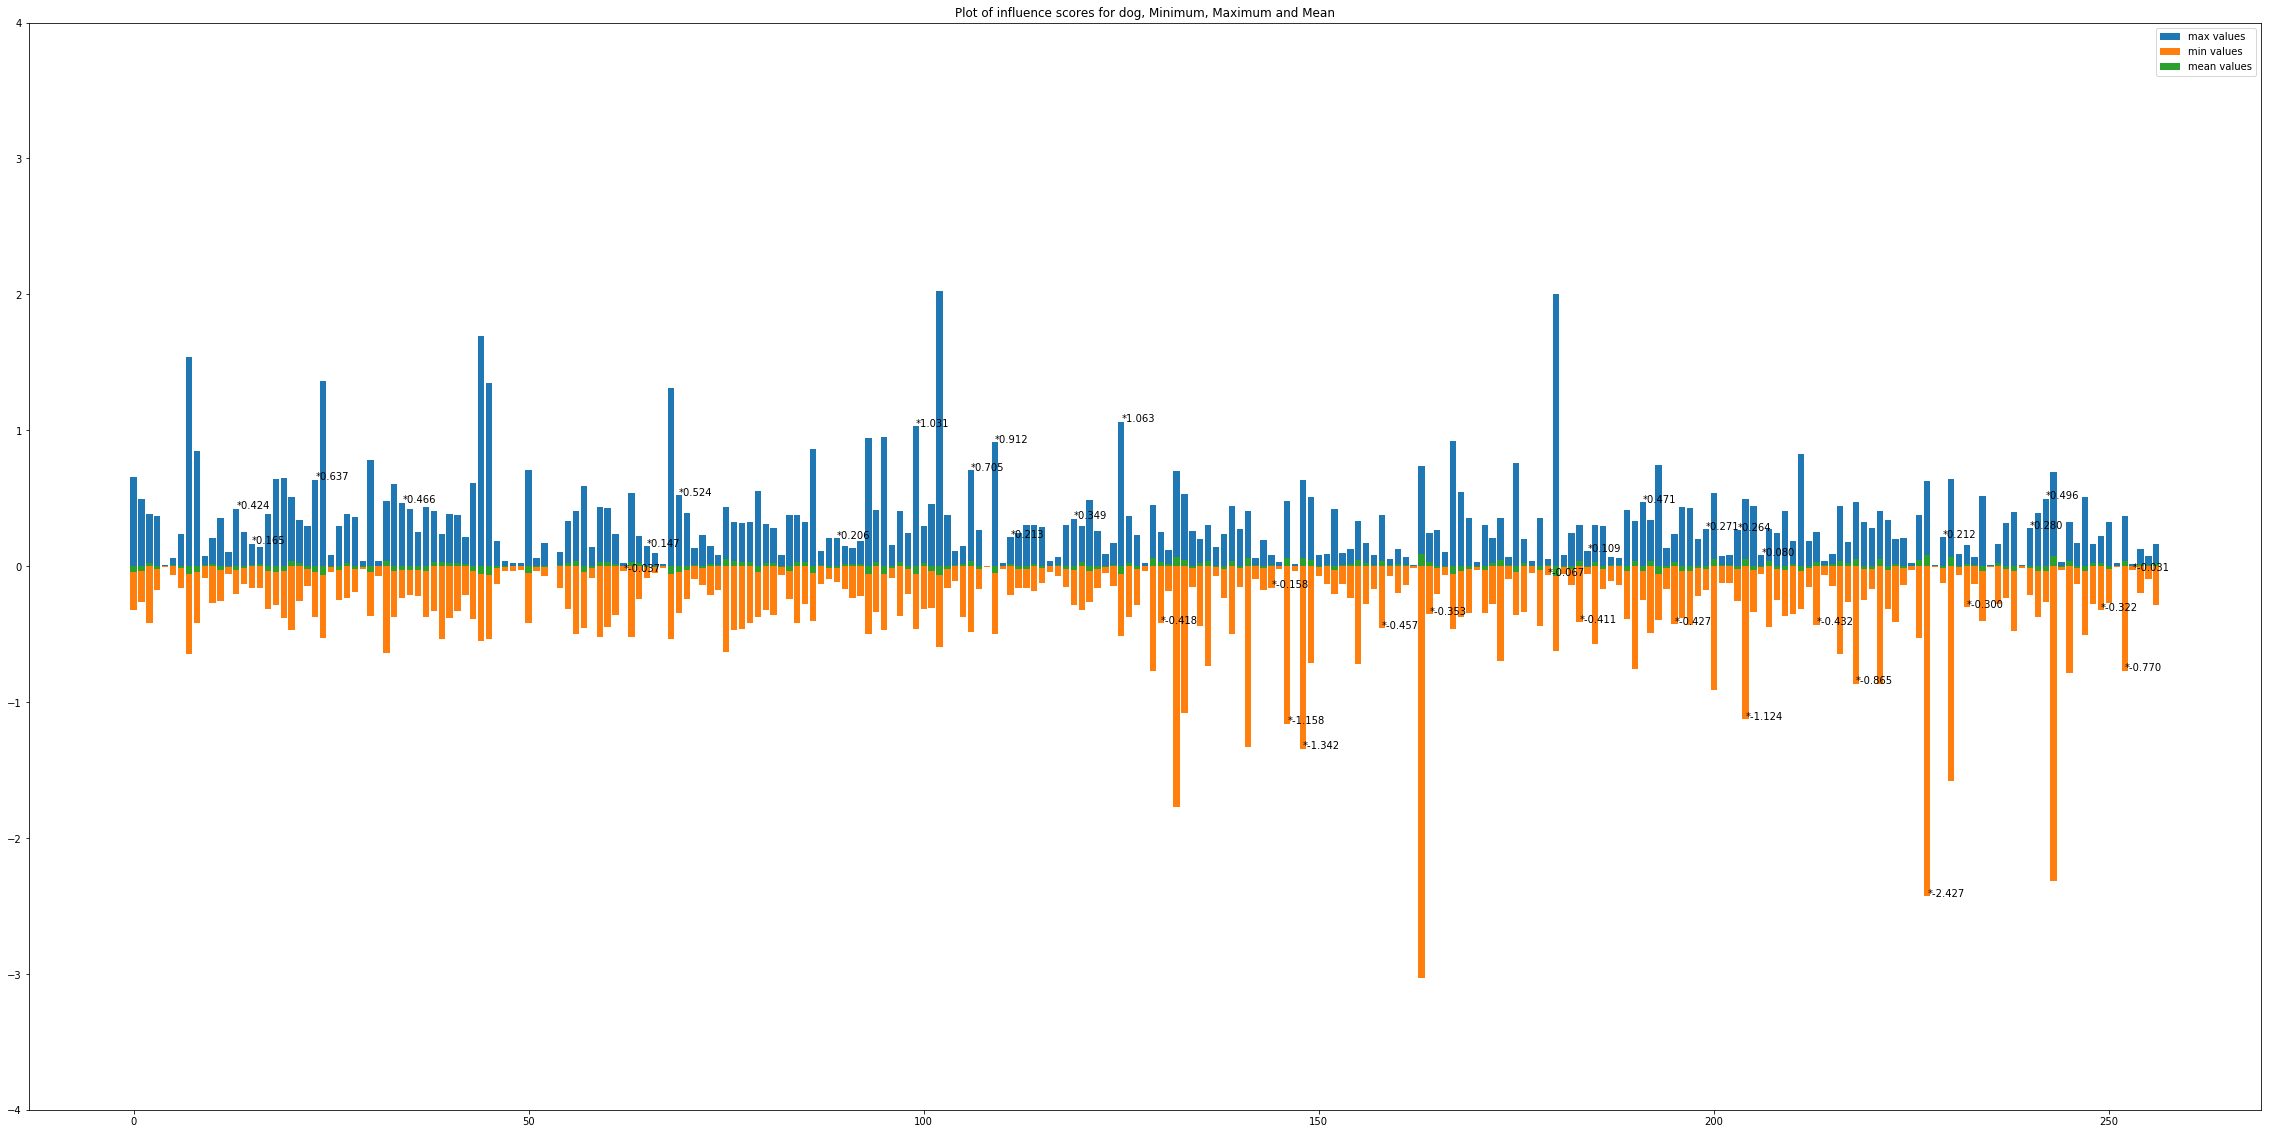

In [37]:
x = np.arange(influence_unbiased.shape[0])[:257]
max_values = np.max(influence_unbiased, axis=1)[:257]
min_values = np.min(influence_unbiased, axis=1)[:257]
mean_values = np.mean(influence_unbiased, axis=1)[:257]



plt.figure(figsize=(40,20))

for i in range(n_points):
    if is_flipped[i]:
        _x = i
        _val = 0.0
        if np.abs(max_values[i]) > np.abs(min_values[i]):
            _y = max_values[i] 
            _val = max_values[i]
        else:
            _y = min_values[i]
            _val = min_values[i]
        
        plt.annotate('*{:0.3f}'.format(_val), xy=(_x, _y), xytext=(_x, _y))

plt.bar(x, max_values, label='max values')
plt.bar(x, min_values, label='min values')
plt.bar(x, mean_values, label='mean values')

plt.ylim(-4.,4.)
plt.legend()
plt.title('Plot of influence scores for dog, Minimum, Maximum and Mean')
# plt.savefig('/')



Text(0.5,1,'Plot of influence scores for dog, Minimum, Maximum and Mean')

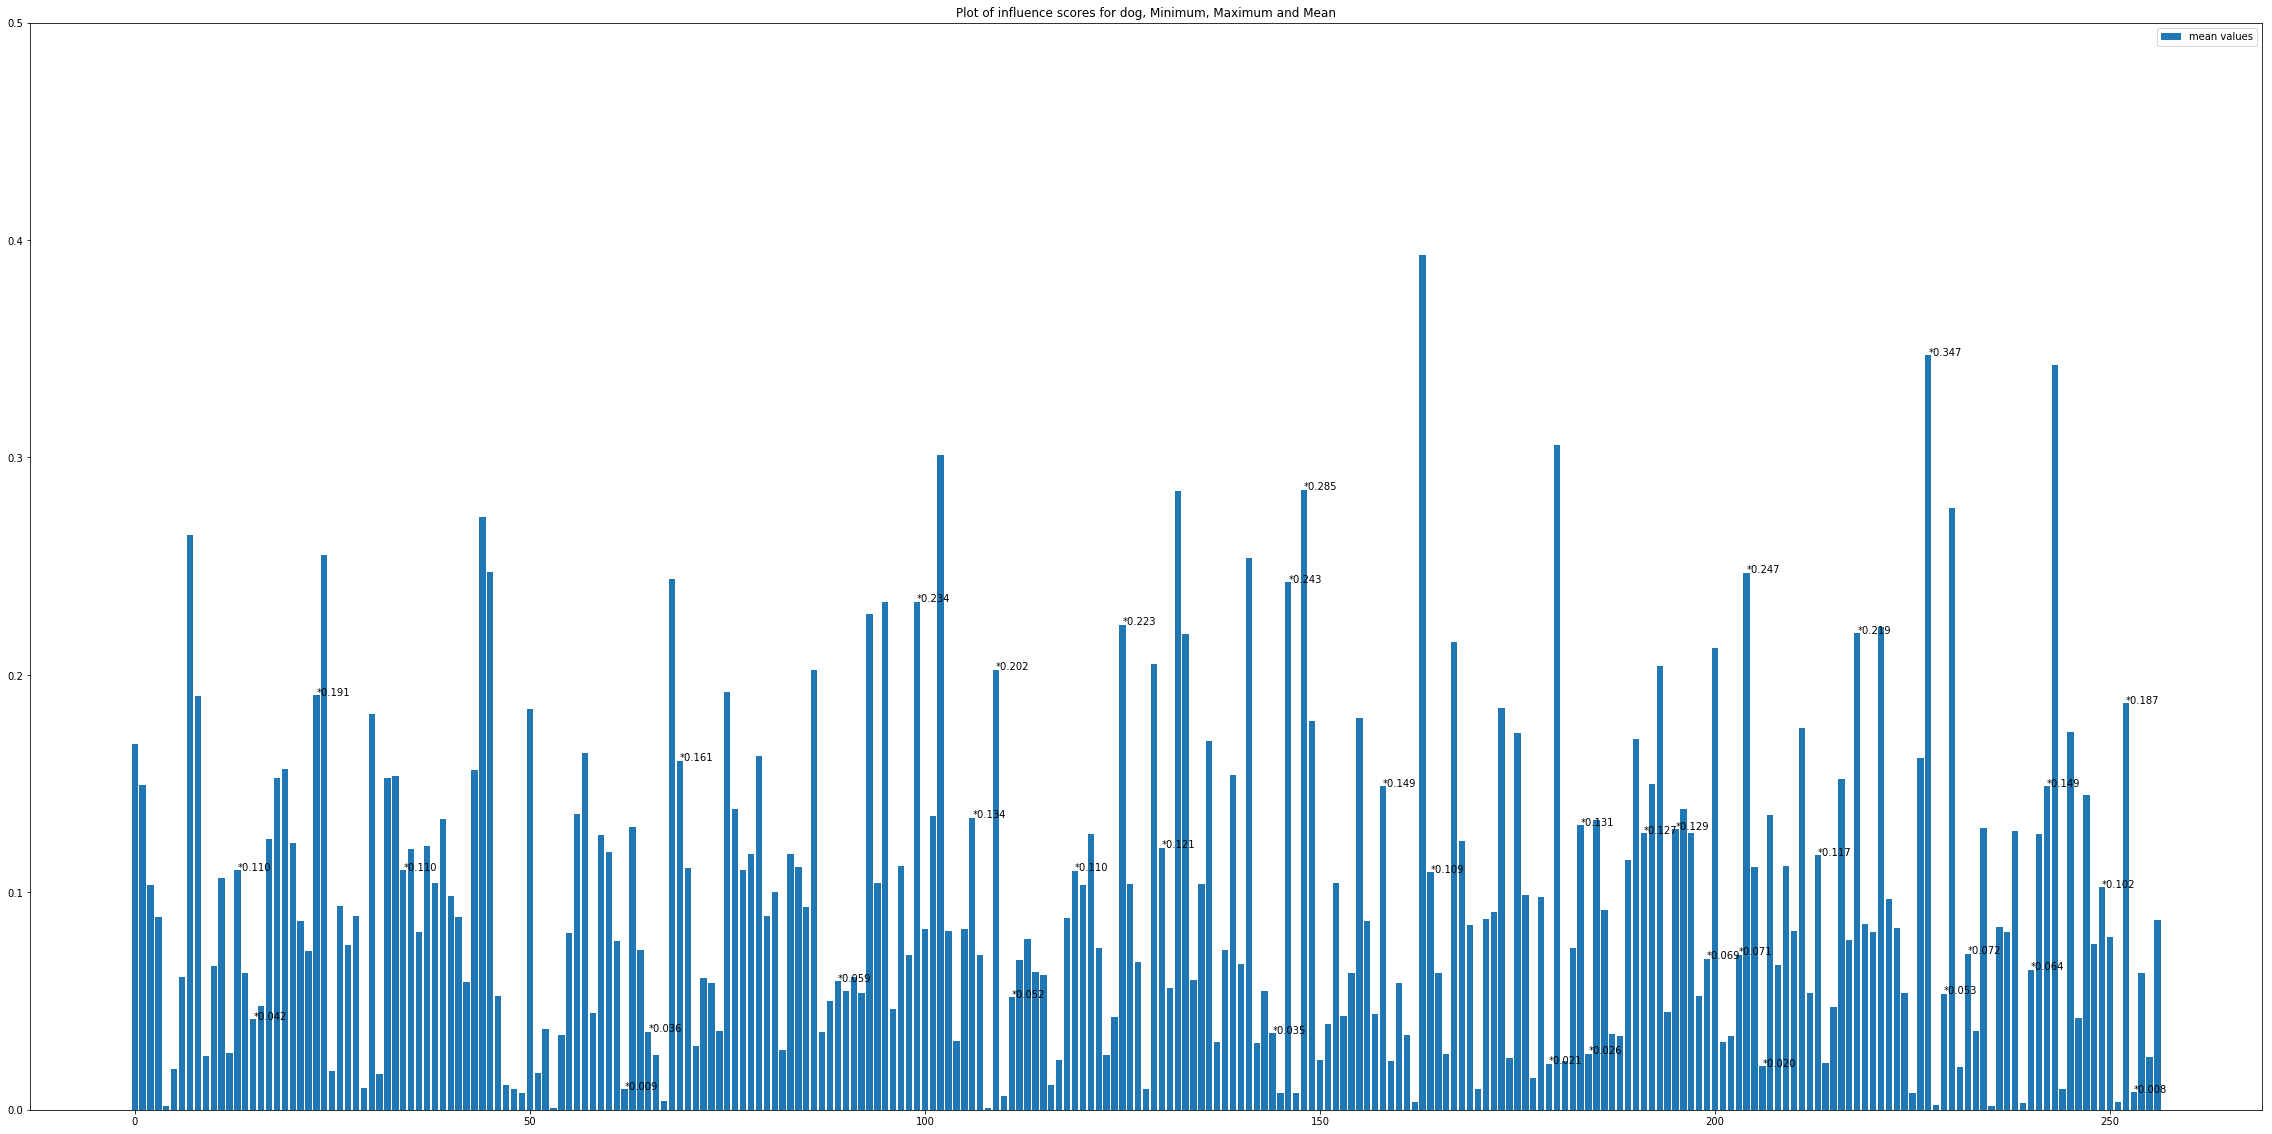

In [44]:
x = np.arange(influence_unbiased.shape[0])[:257]
mean_values = np.mean(np.abs(influence_unbiased), axis=1)[:257]



plt.figure(figsize=(40,20))

for i in range(n_points):
    if is_flipped[i]:
        _x = i
        _y = mean_values[i]
        _val = mean_values[i]
        
        plt.annotate('*{:0.3f}'.format(_val), xy=(_x, _y), xytext=(_x, _y))

# plt.bar(x, max_values, label='max values')
# plt.bar(x, min_values, label='min values')
plt.bar(x, mean_values, label='mean values')

plt.ylim(0,.5)
plt.legend()
plt.title('Plot of influence scores for dog, Minimum, Maximum and Mean')
# plt.savefig('/')


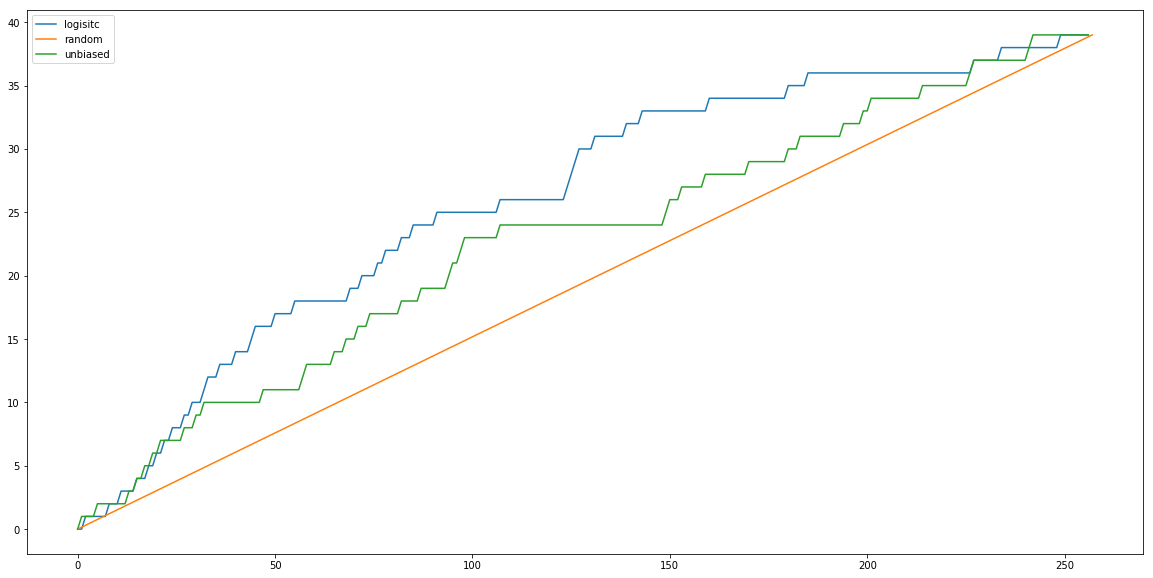

In [73]:
x = np.arange(influence_unbiased.shape[0])[:257]

mean_values_logistic = np.mean(np.abs(influence_logistic), axis=1)[:257]
mean_values_unbiased = np.mean(np.abs(influence_unbiased), axis=1)[:257]

# mean_values_logistic = np.mean(influence_logistic, axis=1)[:257]
# mean_values_unbiased = np.mean(influence_unbiased, axis=1)[:257]



sort_idx = np.argsort(-mean_values_logistic)
y = []
y2 = []
counter = 0
counter2 = 0
for i in range(257):
    idx = sort_idx[i]
    if is_flipped[idx]:
        counter+=1
    
    if i%5 == 0:
        counter2 += 1
    
    y2.append(counter2)
    y.append(counter)

plt.figure(figsize=(20,10))
plt.plot(x,y, label='logisitc')
plt.plot([0,257],[0, 39], label='random')


sort_idx = np.argsort(-mean_values_unbiased)
y = []
counter = 0
for i in range(257):
    idx = sort_idx[i]
    if is_flipped[idx]:
        counter+=1
    
    y.append(counter)

plt.plot(x,y, label='unbiased')
plt.legend()


# mean_values_unbiased = mean_values_unbiased[np.argsort(-mean_values_unbiased)]

# # _is_flipped = is_flipped[np.argsort(mean_values)]


#

# # for i in range(n_points):
# #     if is_flipped[i]:
# #         _x = i
# #         _y = mean_values[i]
# #         _val = mean_values[i]
        
# #         plt.annotate('*{:0.3f}'.format(_val), xy=(_x, _y), xytext=(_x, _y))

# # # plt.bar(x, max_values, label='max values')
# # # plt.bar(x, min_values, label='min values')

# plt.plot(x, mean_values_logistic, label='mean values logistic')
# plt.plot(x, mean_values_unbiased, label='mean values unbiased')


# plt.ylim(0,.5)
# plt.legend()
# plt.title('Plot of influence scores for dog, Minimum, Maximum and Mean')
# plt.savefig('/')

In [71]:
pearsonr(mean_values_logistic, mean_values_unbiased)

(0.24420838866334879, 7.6236114972642226e-05)

In [77]:
dog_imgs_path = '/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/data_dog_flipped0.2/all'

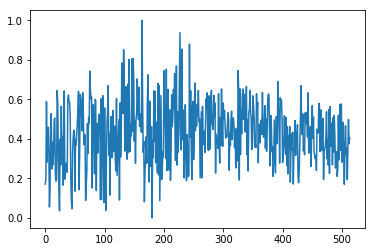

In [86]:
inf_scores = np.mean(influence_logistic, axis=1)
clf = MinMaxScaler()
inf_prob_logistic = clf.fit_transform(inf_scores.reshape(-1,1)).reshape(-1)

plt.plot(np.arange(inf_prob_logistic.shape[0]), inf_prob)

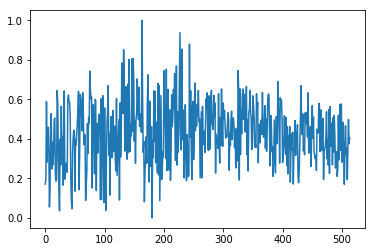

In [87]:
inf_scores = np.mean(influence_unbiased, axis=1)
clf = MinMaxScaler()
inf_prob_unbiased = clf.fit_transform(inf_scores.reshape(-1,1)).reshape(-1)

plt.plot(np.arange(inf_prob_unbiased.shape[0]), inf_prob) 

In [81]:
file_names = jedi_dataset.train_file_names + jedi_dataset.test_file_names

class_names = []
for f in file_names:
    class_names.append( df[df.common_name == f.split('.')[0]]['class'].values[0])

In [82]:
def plot_images(probs, n_vals = 20, top=True):
    
    if top:
        indices = np.argsort(-probs)[:n_vals]
    else:
        indices = np.argsort(probs)[:n_vals]
    
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_vals):
        idx = indices[i]
        img_path = os.path.join(dog_imgs_path, file_names[idx])
        img=mpimg.imread(img_path)
        fig.add_subplot(4, 5, i+1)
        plt.imshow(img)
        plt.title('{:0.3f} - {} - {}'.format(probs[idx],is_flipped[idx], class_names[idx]))
    

# Logistic

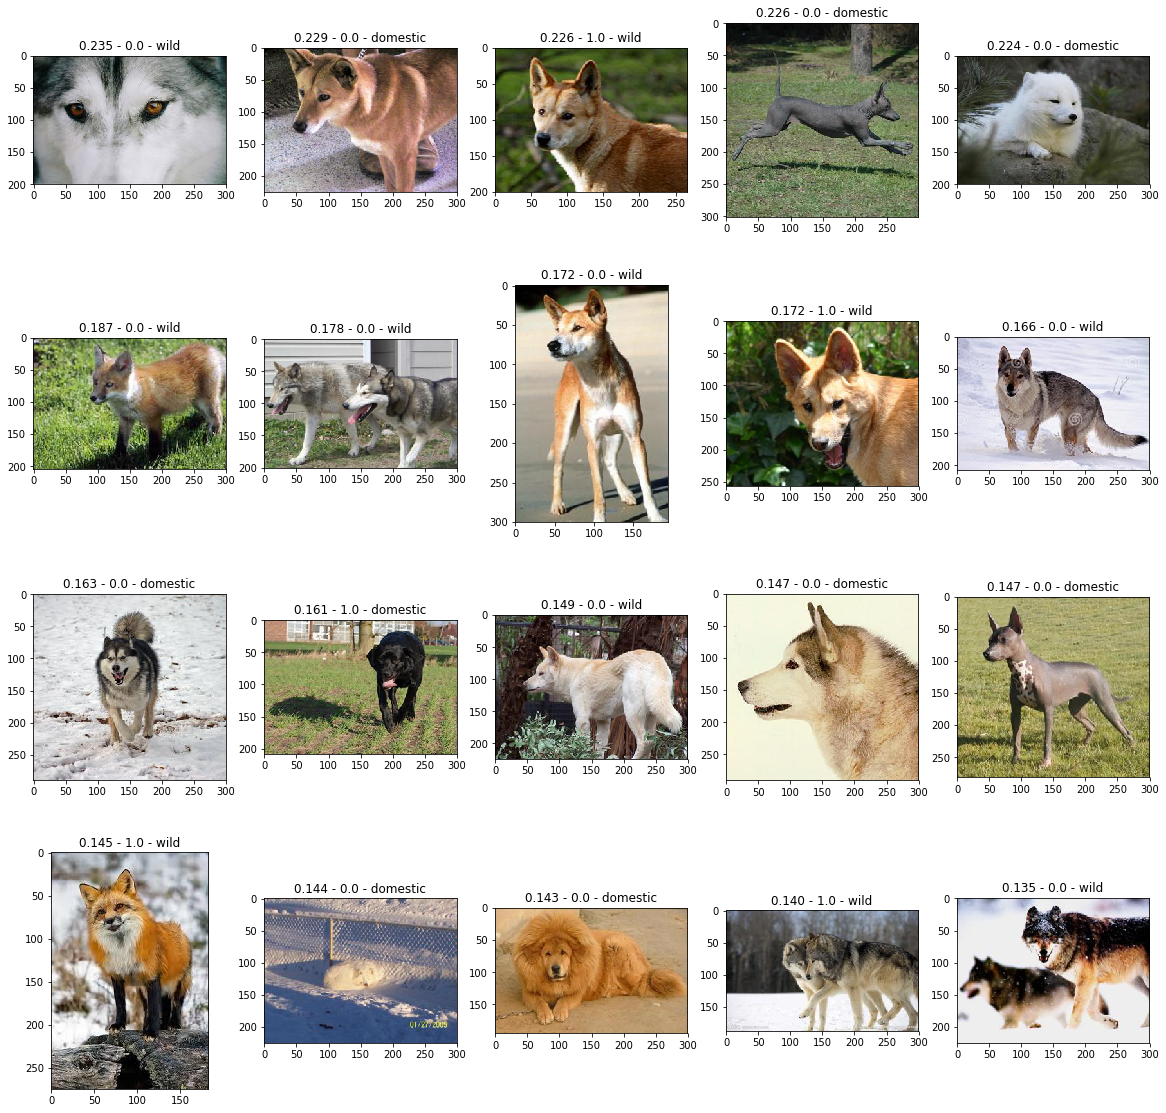

In [83]:
plot_images(mean_values_logistic)

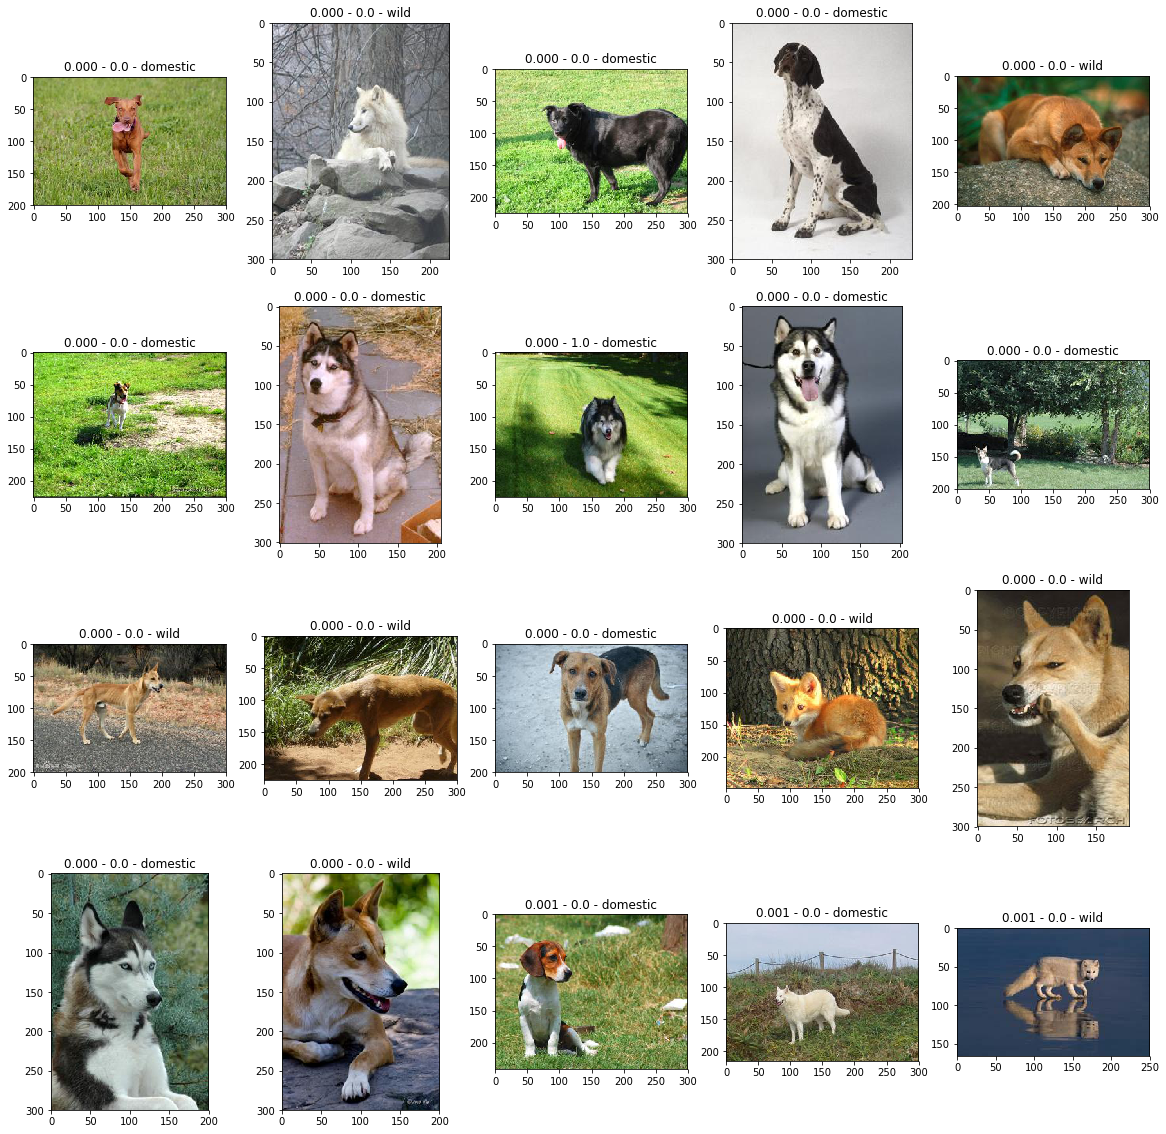

In [85]:
plot_images(mean_values_logistic, top=False)

# Unbiased

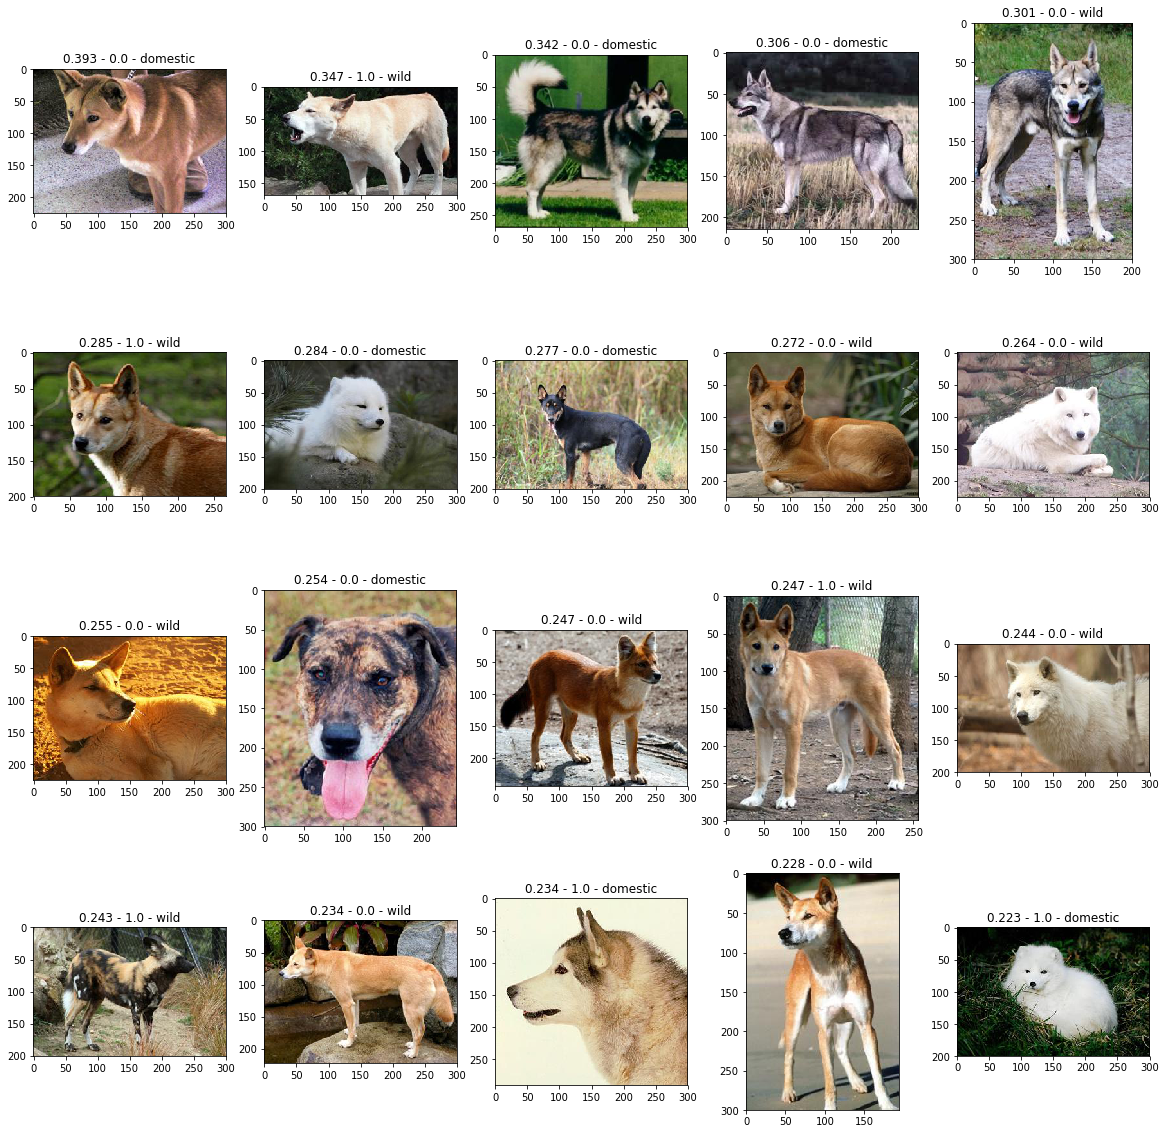

In [86]:
plot_images(mean_values_unbiased, top=True)

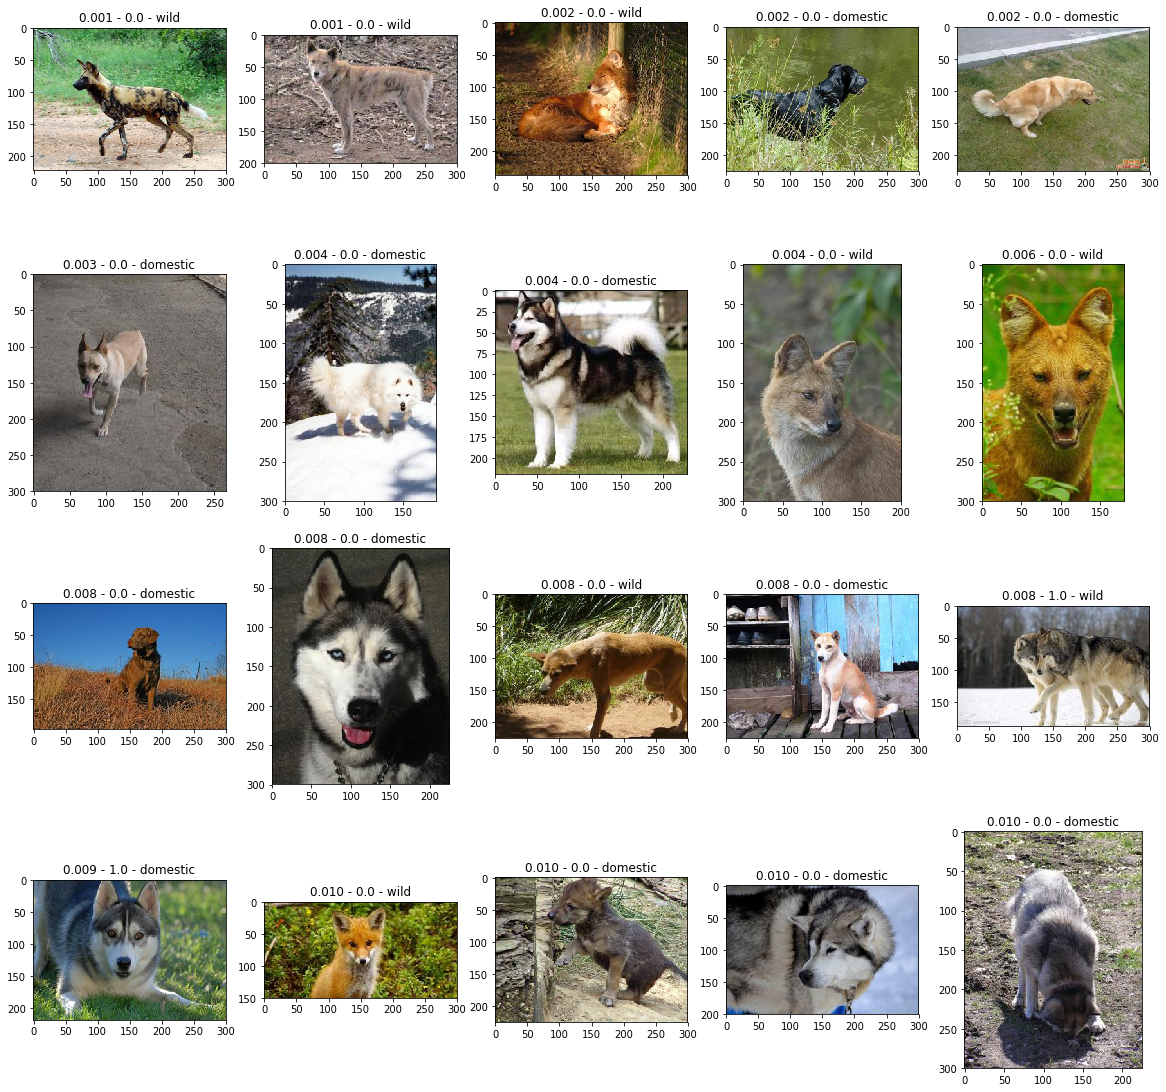

In [87]:
plot_images(mean_values_unbiased, top=False)

# Marginal distance

In [94]:
marginal_dist_logistic = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/cache/dog/marginal_distance_dog_logistic.dat')[:257]
marginal_dist_unbiased = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/cache/dog/marginal_distance_dog_unbiased.dat')[:257]

In [95]:
marginal_dist_logistic = MinMaxScaler().fit_transform(marginal_dist_logistic.reshape(-1,1)).reshape(-1)
marginal_dist_unbiased = MinMaxScaler().fit_transform(marginal_dist_unbiased.reshape(-1,1)).reshape(-1)

In [90]:
from scipy.stats.stats import pearsonr   
from scipy.stats import zscore

In [96]:
marginal_dist_logistic.shape

(257,)

In [100]:
# plt.plot(np.arange(inf_prob_logistic.shape[0]),mean_values_logistic)
# plt.plot(np.arange(inf_prob_logistic.shape[0]),marginal_dist_logistic)

pearsonr(zscore(marginal_dist_logistic), zscore(mean_values_logistic))

(-0.67736167688682258, 7.3560169611405419e-36)

In [99]:
pearsonr(zscore(marginal_dist_unbiased), zscore(mean_values_unbiased))

(-0.23862562681484087, 0.00011211282996232838)

(0.063841570028915967, 0.14836259098169363)

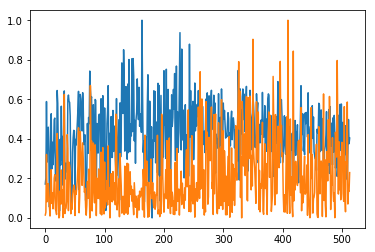

In [152]:
plt.plot(np.arange(inf_prob_logistic.shape[0]),mean_values_logistic)
plt.plot(np.arange(inf_prob_logistic.shape[0]),marginal_dist_unbiased)

pearsonr(zscore(inf_prob_unbiased), zscore(marginal_dist_unbiased))

In [105]:
n = np.random.randn(4,4)
n

array([[ 0.72598232,  1.49955766,  0.78472162,  0.69847504],
       [ 1.71769842,  0.54443233,  0.50865661, -0.52956284],
       [-0.0973023 , -0.52242824,  1.48212337,  1.86318643],
       [ 0.59677899, -1.89840917,  1.01523246,  2.05994376]])

In [112]:
train_data, yS = joblib.load('/tmp/svhn.dat')

In [114]:
x = train_data[0]
y = yS[0]

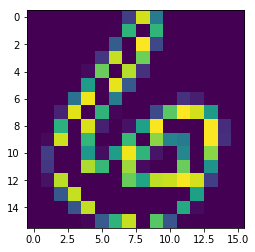

In [115]:
plt.imshow(x)

In [119]:
from scipy.misc import imresize

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


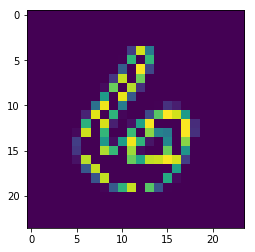

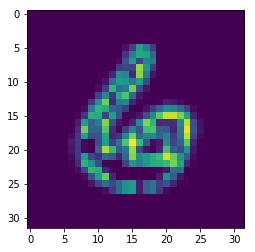

In [124]:
_x = np.pad(x, pad_width=4, mode='constant')
plt.figure()
plt.imshow(_x)
_x = imresize(_x, size=(32,32))
plt.figure()
plt.imshow(_x)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


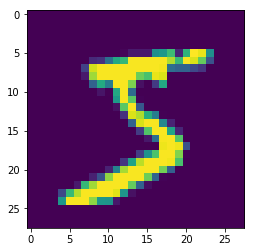

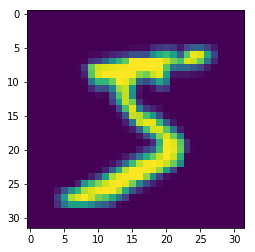

In [128]:
train_data, yS = joblib.load('/tmp/mnist.dat')
x = train_data[0]
y = yS[0]

plt.figure()
plt.imshow(x)

_x = imresize(x, size=(32,32))
plt.figure()
plt.imshow(_x)